In [1]:
from cair_maze.envs.maze_env import MazeOptions

options = MazeOptions(render_mode="jupyter", radius=2, width=16, height=16)
options

MazeOptions(width=16, height=16, algorithm='randomized_prim', render_mode='jupyter', colors=Colors(agent=<Color.RED: (255, 0, 0)>, target=<Color.GREEN: (0, 255, 0)>, fog=<Color.GRAY: (128, 128, 128)>, wall=<Color.BLACK: (0, 0, 0)>, background=<Color.WHITE: (255, 255, 255)>), image_size=(84, 84), window_height=300, radius=2)

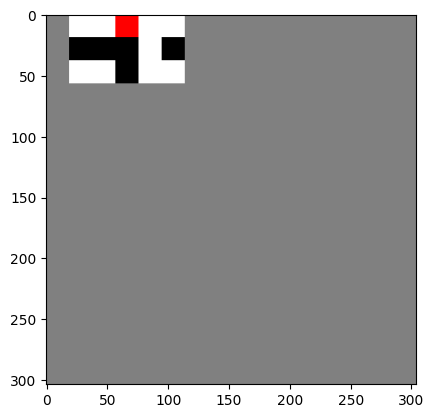

In [2]:
import gymnasium as gym

# example environment with partial visibility
env = gym.make("cair_maze:MazeEnv-v0", options=options)
env.reset();

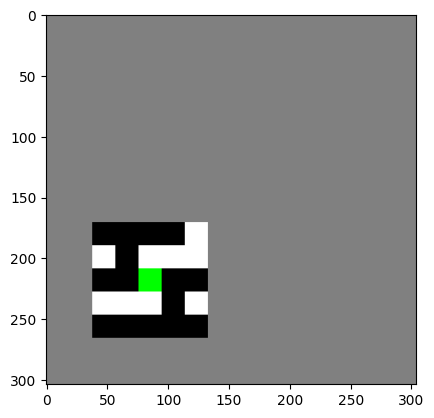

Shortest path took 22 moves


In [3]:
env.solve();

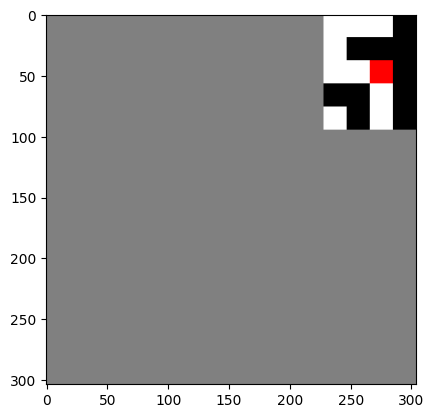

In [2]:
import gymnasium as gym

# example environment with partial visibility
env = gym.make("cair_maze:MazeEnv-v0", options=options)
env.reset();

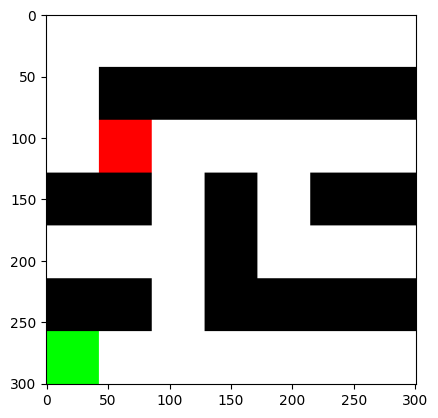

In [3]:
# start with simpler maze for training

options.radius = None
options.width = 7
options.height = 7
env = gym.make("cair_maze:MazeEnv-v0", options=options)
env.reset();

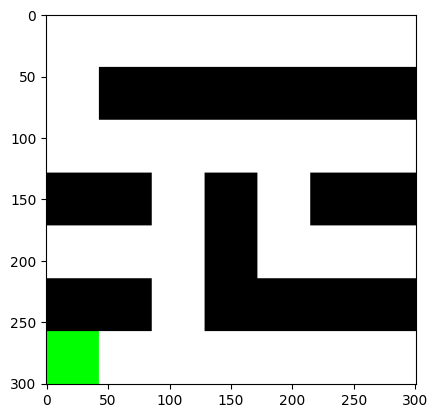

Shortest path took 7 moves


In [4]:
env.solve()

In [5]:
from dream.dream import Dream
from dream.memory import ReplayMemory
from dream.util import config_class

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

config = config_class(
    history_length=1,
    batch_size=16,
    screen_width=84,
    screen_height=84,
    screen_dim=1,
    action_size=4,
    cnn_format="N/A",
    memory_size=1000
)

memory = ReplayMemory(config)
dream = Dream(config, memory)

input action shape = (None, 4)
input image shape = (None, 84, 84, 1)
Metal device set to: Apple M1
encoded image shape = (None, 64)
encoded action shape = (None, 64)
output.shape = (None, 84, 84, 1)


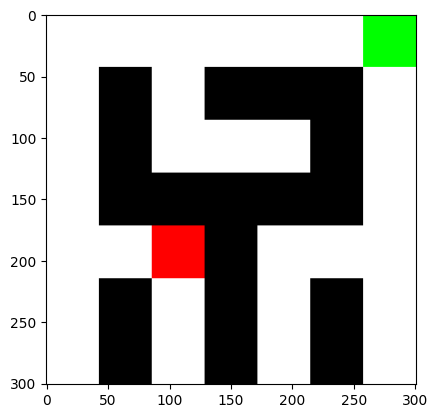

prestates.shape = (16, 84, 84, 1)
poststates.shape = (16, 84, 84, 1)
actions.shape = (16, 4)
1/1 [==============================] - 0s 152ms/step - loss: 38919.8789 - accuracy: 0.3269


In [6]:
import random
import numpy as np
import cair_maze

observation, info = env.reset()
state = info["image"]

# for step in range(0, 1000000000000):
for step in range(0, 20):
    action = random.randint(0, 3)
    observation, reward, terminal, _, info = env.step(action)
    state = info["image"]
    state = np.expand_dims(rgb2gray(state), 2)

    # Add sample to replay buffer
    memory.add(state, reward, action, terminal)

    # if step > 50:
    if step > 5:
        dream.train()

    if step > 50 and step % 500 == 0:
        dream.test()

    if terminal:
        observation, info = env.reset()
        state = info["image"]